In [1]:
import pycocotools
import pycocotools.mask
import numpy as np
from PIL import Image
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import json
from visualize import show_masks
from visualize import show_mask
from visualize import show_box
import torch
import hydra
import cv2
import matplotlib.image as mpimg
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
import numpy as np
from ultralytics import YOLO
from detect import DetectionModel


In [2]:
np.random.seed(3)

In [3]:
checkpoint = "/home/vik0t/hackaton/segment-anything-2/sam2.1_hiera_base_plus.pt"
model_cfg = "sam2.1_hiera_b+.yaml"
predictor = SAM2ImagePredictor(build_sam2(model_cfg, checkpoint))
FINE_TUNED_MODEL_WEIGHTS = "/home/vik0t/hackaton/segment-anything-2/fine_tuned_sam2_13500.pt"
predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))

<All keys matched successfully>

In [4]:
detection_model = DetectionModel("/home/vik0t/hackaton/runs/detect/train8/weights/best.pt") # Model weights are automatically downloaded.

In [13]:
img_path='/home/vik0t/hackaton/0a4c5ce62b6bc91348c0b99fc91b1652.JPG'

In [14]:
res=detection_model.predict(img_path)
img = cv2.imread(img_path)

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(img)

    masks, scores, _ = predictor.predict(box=res.boxes.xyxy[0],  point_coords=None, point_labels=None, multimask_output=False)


image 1/1 /home/vik0t/hackaton/0a4c5ce62b6bc91348c0b99fc91b1652.JPG: 352x640 2 Animals, 27.5ms
Speed: 4.9ms preprocess, 27.5ms inference, 3.4ms postprocess per image at shape (1, 3, 352, 640)


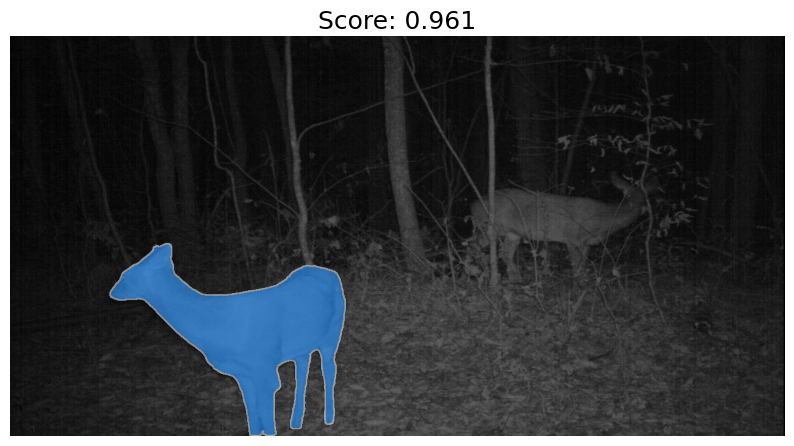

In [15]:
show_masks(img, masks[0], scores[0])


In [8]:
cv2.imwrite("govno.png",detection_model.add_noise(img))

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


In [ ]:
folder_to_dataset='/home/vik0t/hackaton/test_images'
results = detection_model(folder_to_dataset)

TypeError: 'DetectionModel' object is not callable